In [1]:
%pip install git+https://github.com/cioos-siooc/ocean-data-parser.git

%pip install folium 
%pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/HakaiInstitute/ocean-data-parser.git to /tmp/pip-req-build-115vqbh6
  Running command git clone -q https://github.com/HakaiInstitute/ocean-data-parser.git /tmp/pip-req-build-115vqbh6
  Created wheel for ocean-data-parser: filename=ocean_data_parser-0.1.0-py3-none-any.whl size=42111 sha256=d15df3d587f429752eb3cb52029dee7ef5b5d868dc97e03dc38016af7bb2cee5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4h9jxxdz/wheels/da/13/ab/3935dafef906d730e8b8408501739fcba46984c1d62b638d10
Successfully built ocean-data-parser


In [1]:
from ocean_data_parser.parsers import nmea
import pandas as pd
from glob import glob
from tqdm import tqdm

import folium

import numpy as np


# Download test data 
NMEA test data is available here:

https://github.com/HakaiInstitute/ocean-data-parser/tree/main/tests/parsers_test_files/nmea

In [2]:
# retrieve raw data


# Read NMEA file

## Parse NMEA to a table format

In [3]:
nmea_files = glob("../tests/parsers_test_files/nmea/seaspan/nmeadata-*.txt")
nmea_parsed = [
    nmea.file(file).to_dataframe()
    for file in tqdm(nmea_files, desc="Import nmea files", unit="file")
]
# Aggregate all files
df = pd.concat(nmea_parsed)
df


Import nmea files: 100%|██████████| 86/86 [00:28<00:00,  3.00file/s]


,row,prefix,talker,sentence_type,subtype,manufacturer,b_pressure_inch,inches,b_pressure_bar,bars,...,longitude_degrees_east,gps_datetime,heading,hdg_true,wind_angle,reference,wind_speed,wind_speed_units,wind_speed_relative_to_platform_knots,wind_direction_relative_to_platform
index,,,,,,,,,,,,,,,,,,,,,
0,0,20220705 120001+00:00,II,MDA,None,None,29.9,I,1.013,B,...,NaN,NaT,NaN,None,NaN,None,NaN,None,NaN,NaN
1,1,20220705 120001+00:00,GP,RMC,None,None,NaN,None,NaN,None,...,-123.42983,2022-07-05 11:59:56+00:00,NaN,None,NaN,None,NaN,None,NaN,NaN
2,2,20220705 120001+00:00,HC,HDT,None,None,NaN,None,NaN,None,...,NaN,NaT,22.9,T,NaN,None,NaN,None,NaN,NaN
3,3,20220705 120001+00:00,WI,MWV,None,None,NaN,None,NaN,None,...,NaN,NaT,NaN,None,5.30,R,9.68,N,9.68,5.30
4,4,20220705 120003+00:00,II,MDA,None,None,29.9,I,1.013,B,...,NaN,NaT,NaN,None,NaN,None,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,7194,20220702 025956+00:00,WI,MWV,None,None,NaN,None,NaN,None,...,NaN,NaT,NaN,None,68.70,R,1.89,N,1.89,68.70
7195,7195,20220702 025958+00:00,HC,HDT,None,None,NaN,None,NaN,None,...,NaN,NaT,272.8,T,NaN,None,NaN,None,NaN,NaN
7196,7196,20220702 025958+00:00,II,MDA,None,None,29.9,I,1.013,B,...,NaN,NaT,NaN,None,NaN,None,NaN,None,NaN,NaN


## Convert prefix of NMEA to datetime

In [4]:
# In this case the each rows prefix prior to the NMEA string is a timestamp, convert it to a datetime object
df["computer_time"] = pd.to_datetime(df["prefix"])


# Reseample NMEA data to 2s

In [5]:
# Use the prefix timestamp as an index and resample the data to a 5 min interval and keep the first good value
df_resampled = df.set_index("computer_time").resample("2s").first()
df_resampled.head()


,row,prefix,talker,sentence_type,subtype,manufacturer,b_pressure_inch,inches,b_pressure_bar,bars,...,longitude_degrees_east,gps_datetime,heading,hdg_true,wind_angle,reference,wind_speed,wind_speed_units,wind_speed_relative_to_platform_knots,wind_direction_relative_to_platform
computer_time,,,,,,,,,,,,,,,,,,,,,
2022-07-02 00:00:00+00:00,0.0,20220702 000001+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,-123.10683,2022-07-01 23:59:56+00:00,1.8,T,325.09,R,5.38,N,5.38,325.09
2022-07-02 00:00:02+00:00,4.0,20220702 000003+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,-123.10683,2022-07-02 23:59:58+00:00,1.7,T,354.99,R,6.30,N,6.30,354.99
2022-07-02 00:00:04+00:00,8.0,20220702 000005+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,-123.10683,2022-07-02 00:00:00+00:00,1.7,T,313.59,R,7.48,N,7.48,313.59
2022-07-02 00:00:06+00:00,12.0,20220702 000007+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,-123.10683,2022-07-02 00:00:02+00:00,1.7,T,313.49,R,8.18,N,8.18,313.49
2022-07-02 00:00:08+00:00,16.0,20220702 000009+00:00,HC,HDT,None,None,29.9,I,1.014,B,...,-123.10683,2022-07-02 00:00:04+00:00,1.7,T,288.69,R,4.20,N,4.20,288.69


# Plot Resulting Data

array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>],
      dtype=object)

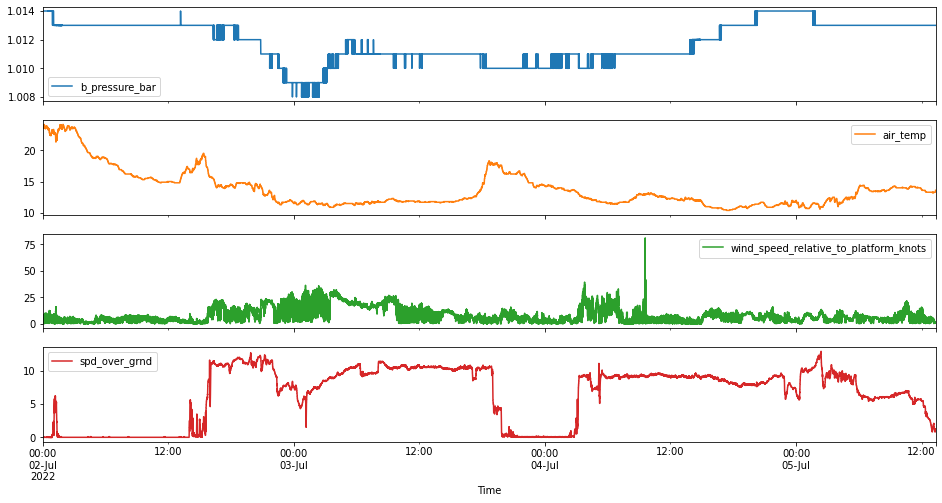

In [6]:
# Plot data
df_resampled[
    [
        "b_pressure_bar",
        "air_temp",
        "wind_speed_relative_to_platform_knots",
        "spd_over_grnd",
    ]
].plot(xlabel="Time", figsize=(16, 8), subplots=True)


# Plot position on a map

In [7]:
# Plot lat/lon on a map
lat, lon = "latitude_degrees_north", "longitude_degrees_east"
map = folium.Map(location=df_resampled[[lat, lon]].mean(), zoom_start=8)
folium.PolyLine(df_resampled[[lat, lon]].dropna().values, color="red").add_to(map)
map


# Computer  time offset vs GPS

<AxesSubplot:xlabel='computer_time', ylabel='GPS - Computer Time (s)'>

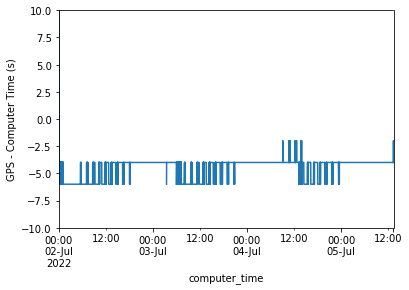

In [8]:
(df_resampled["gps_datetime"] - df_resampled.index).dt.total_seconds().plot(
    ylabel="GPS - Computer Time (s)", ylim=[-10, 10]
)


# Review Boat Heading vs True Course Data

<AxesSubplot:ylabel='Frequency'>

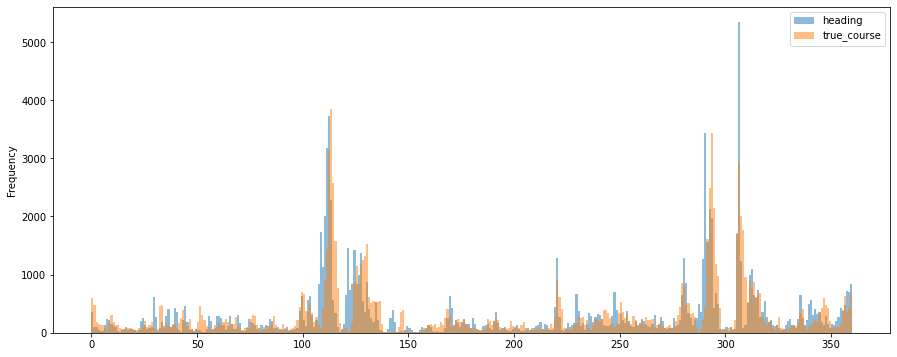

In [9]:
# Let's consider only data when the boat is moving and there's wind measured
df_review = df_resampled.query(
    "spd_over_grnd>2 and wind_speed_relative_to_platform_knots>1 and gps_datetime>'2022-07-02T12:00:00Z'"
)

df_review[["heading", "true_course"]].astype(float).plot.hist(
    stacked=False, alpha=0.5, bins=360, figsize=(15, 6)
)


<AxesSubplot:title={'center':'Boat Heading vs True Course'}, xlabel='computer_time'>

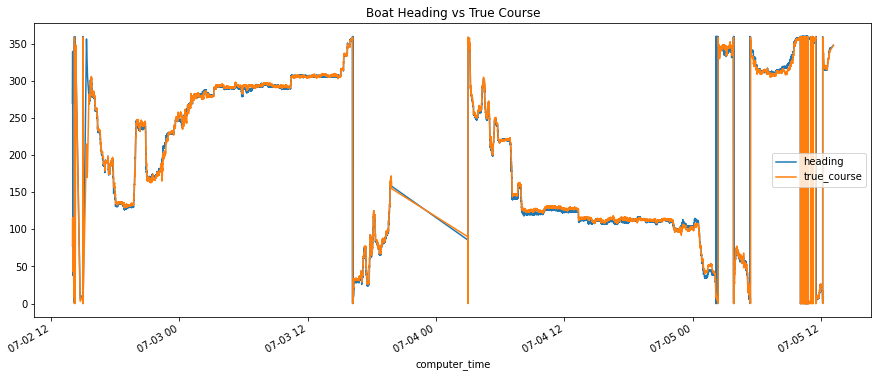

In [10]:
df_review[["heading", "true_course"]].plot(
    figsize=(15, 6), title="Boat Heading vs True Course"
)


<AxesSubplot:title={'center':'Boat Heading vs True Course'}, ylabel='Frequency'>

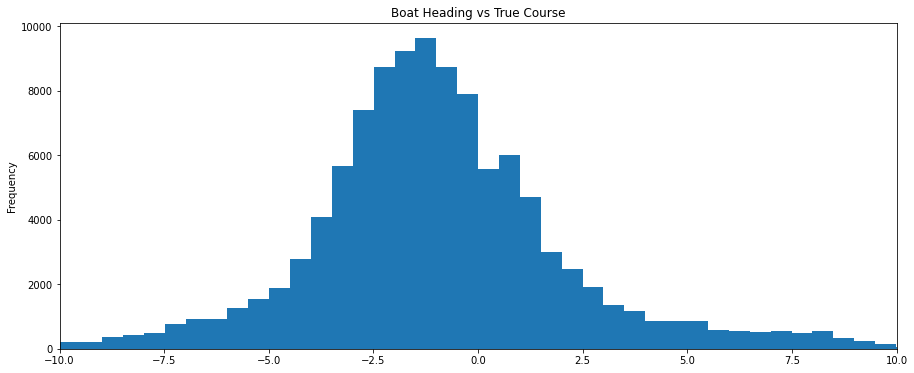

In [11]:
# Compute the difference between the boat heading vs the true_course angle
(df_review["heading"] - df_review["true_course"]).plot.hist(
    bins=1440, figsize=(15, 6), xlim=[-10, 10], title="Boat Heading vs True Course"
)


# Review Wind Data

The wind_angle data is refering to the airmar orientation. We need to apply the following transformations:
1. Define the angle difference between the AIRMAR 0 deg direction, vs the boat heading data. Should be a constant offset
2. Transform the AIRMAR wind data to the earth reference frame (EARTH COORDINATES)
3. Substract the boat motion from the wind data in EARTH COORDINATES


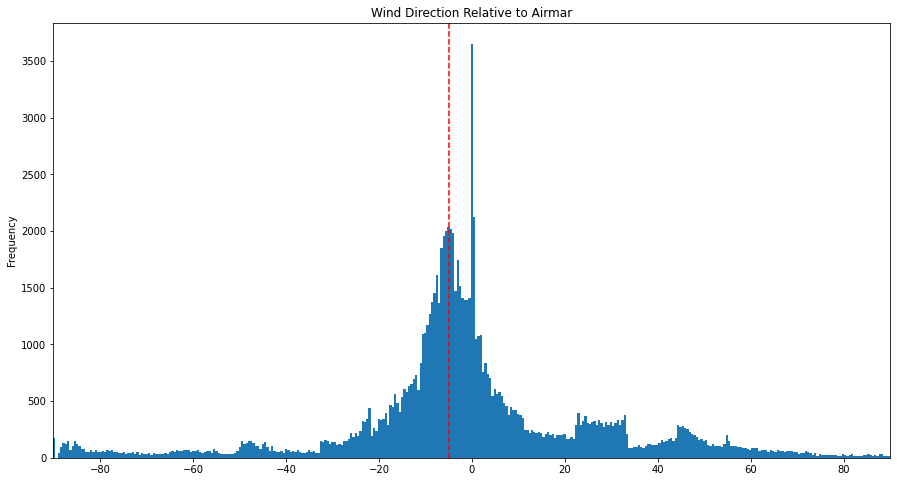

In [12]:
# Review the wind direction when the ship is moving faster than 2 (m/s?)
ax = (
    df_review["wind_direction_relative_to_platform"]
    .apply(lambda x: x if x < 180 else x - 360)
    .plot.hist(
        bins=720,
        figsize=(15, 8),
        xlim=[-90, 90],
        xlabel="Wind Angle",
        title="Wind Direction Relative to Airmar",
    )
)
ax.axvline(-5, color="red", linestyle="--")


## Substract boat component from the AIRMAR wind data

In [13]:
# Define tools to be used to correct platform reference wind to earth coordinate wind

AIRMAR_HEADING_OFFSET_CORRECTION = 5


def spddir_to_uv(spd, dir):
    return spd * np.cos(dir / 180 * np.pi), spd * np.sin(dir / 180 * np.pi)


def uv_to_spddir(u, v):
    return np.sqrt(u**2 + v**2), np.arctan2(v, u) / np.pi * 180


def instruments_to_earth_coordinates(speed_inst, dir_inst, platform_inst, platform_dir):

    # Convert both speed,directions data to u,v components
    u_inst, v_inst = spddir_to_uv(speed_inst, dir_inst)
    u_platform, v_platform = spddir_to_uv(platform_inst, platform_dir)

    # Substract the platform speed from the measurement
    u, v = u_inst - u_platform, v_inst - v_platform

    # Convert to speed direction
    return uv_to_spddir(u, v)


In [18]:
# Apply correction to platform wind
(
    df_resampled["wind_speed_knots"],
    df_resampled["wind_direction"],
) = instruments_to_earth_coordinates(
    df_resampled["wind_speed_relative_to_platform_knots"],
    df_resampled["wind_direction_relative_to_platform"]
    + df_resampled["heading"]
    + AIRMAR_HEADING_OFFSET_CORRECTION,
    df_resampled["spd_over_grnd"],
    df_resampled["true_course"],
)


array([<AxesSubplot:xlabel='computer_time', ylabel='Speed (knots)'>,
       <AxesSubplot:xlabel='computer_time', ylabel='Speed (knots)'>,
       <AxesSubplot:xlabel='computer_time', ylabel='Speed (knots)'>],
      dtype=object)

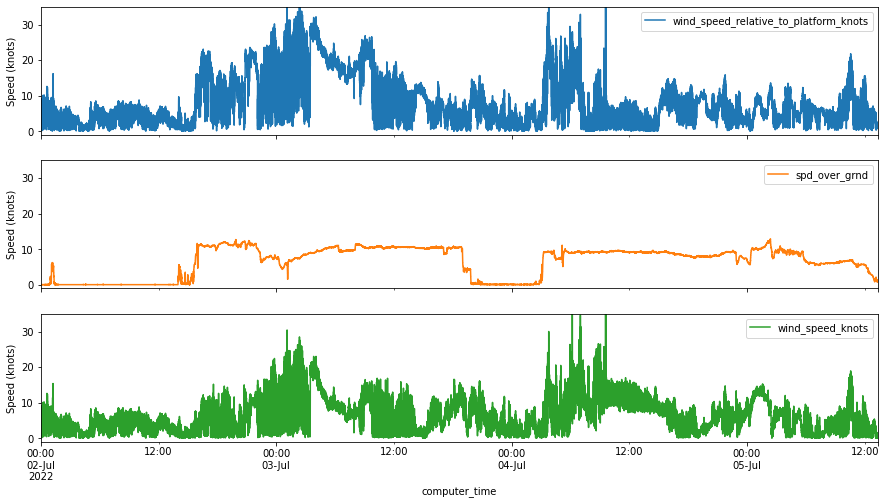

In [19]:
# Plot all wind speeds and boat speeds
df_resampled[
    ["wind_speed_relative_to_platform_knots", "spd_over_grnd", "wind_speed_knots"]
].plot(subplots=True, figsize=(15, 8), ylim=[-1, 35], ylabel="Speed (knots)")


In [21]:
df_resampled[].to_csv("seaspan_royal_nmea_table_2022-07-02_to_2022-07-05.csv")


# Save result to CSV

In [24]:
variables_to_output = [
    "b_pressure_inch",
    "b_pressure_bar",
    "air_temp",
    "spd_over_grnd",
    "true_course",
    "latitude_degrees_north",
    "longitude_degrees_east",
    "gps_datetime",
    "heading",
    "hdg_true",
    "wind_speed_relative_to_platform_knots",
    "wind_direction_relative_to_platform",
    "corrected_wind_speed",
    "corrected_wind_direction",
]
df_resampled[variables_to_output].to_csv('seaspan_royal_nmea_table_2022-07-02_to_2022-07-05.csv')
